Machine Learning Final Project

-- Pre Processing Data

In [115]:
#!pip install pandas scikit-learn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # or RandomForestRegressor for regression
from sklearn.metrics import accuracy_score  # or mean_squared_error for regression
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [116]:
df = pd.read_csv('/Users/karukavina/Documents/VSCODEFiles/ML/ML-Final-Project/student-mat.csv', sep=';')
print(df.head())
# had to seperate by ; instead of the default , bc that is standard practice is european countries

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher   
1     GP   F   17       U     GT3       T     1     1  at_home     other   
2     GP   F   15       U     LE3       T     1     1  at_home     other   
3     GP   F   15       U     GT3       T     4     2   health  services   
4     GP   F   16       U     GT3       T     3     3    other     other   

   reason guardian  traveltime  studytime  failures schoolsup famsup paid  \
0  course   mother           2          2         0       yes     no   no   
1  course   father           1          2         0        no    yes   no   
2   other   mother           1          2         3       yes     no  yes   
3    home   mother           1          3         0        no    yes  yes   
4    home   father           1          2         0        no    yes  yes   

  activities nursery higher internet romantic  famrel  freetime  goout  Dalc  \


In [117]:
# Data Cleaning and preprocessing

# Drop G1 and G2 to avoid data leakage
df = df.drop(columns=['G1', 'G2'])

# Binary Encoding for yes/no and binary features
binary_columns = ['sex', 'address', 'famsize', 'Pstatus', 'schoolsup', 'famsup',
                  'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

for col in binary_columns:
    df[col] = df[col].map({'yes': 1, 'no': 0, 'F': 0, 'M': 1, 'U': 1, 'R': 0, 'LE3': 0, 'GT3': 1, 'T': 1, 'A': 0})

# One-Hot Encoding for nominal categorical variables
df = pd.get_dummies(df, columns=['school', 'Mjob', 'Fjob', 'reason', 'guardian'], drop_first=True)

print(df.head())



   sex  age  address  famsize  Pstatus  Medu  Fedu  traveltime  studytime  \
0    0   18        1        1        0     4     4           2          2   
1    0   17        1        1        1     1     1           1          2   
2    0   15        1        0        1     1     1           1          2   
3    0   15        1        1        1     4     2           1          3   
4    0   16        1        1        1     3     3           1          2   

   failures  schoolsup  famsup  paid  activities  nursery  higher  internet  \
0         0          1       0     0           0        1       1         0   
1         0          0       1     0           0        0       1         1   
2         3          1       0     1           0        1       1         1   
3         0          0       1     1           1        1       1         1   
4         0          0       1     1           0        1       1         0   

   romantic  famrel  freetime  goout  Dalc  Walc  health  abse

UNSUPERVISED MODEL
*kmeans clustering*

In [118]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import seaborn as sns

In [119]:
#drop the target variable
df_unsupervised = df.drop(columns=['G3'], errors = 'ignore')

In [120]:
#converting one hot encoding to binary
binary_columns_one_hot = ['Mjob_health', 'Mjob_other', 'Mjob_services',
       'Mjob_teacher', 'Fjob_health', 'Fjob_other', 'Fjob_services',
       'Fjob_teacher', 'reason_home', 'reason_other', 'reason_reputation',
       'guardian_mother', 'guardian_other']

for col in binary_columns_one_hot:
    df_unsupervised[col] = df_unsupervised[col].map({True: 1, False: 0})

In [121]:
df_unsupervised

,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,school_MS,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other
0,0,18,1,1,0,4,4,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,False,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,17,1,1,1,1,1,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,False,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,15,1,0,1,1,1,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,False,0,0,0,0,0,1,0,0,0,1,0,1,0
3,0,15,1,1,1,4,2,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,False,1,0,0,0,0,0,1,0,1,0,0,1,0
4,0,16,1,1,1,3,3,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,False,0,1,0,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,20,1,0,0,2,2,1,2,2,0,1,1,0,1,1,0,0,5,5,4,4,5,4,11,True,0,0,1,0,0,0,1,0,0,0,0,0,1
391,1,17,1,0,1,3,1,2,1,0,0,0,0,0,0,1,1,0,2,4,5,3,4,2,3,True,0,0,1,0,0,0,1,0,0,0,0,1,0
392,1,21,0,1,1,1,1,1,1,3,0,0,0,0,0,1,0,0,5,5,3,3,3,3,3,True,0,1,0,0,0,1,0,0,0,0,0,0,1
393,1,18,0,0,1,3,2,3,1,0,0,0,0,0,0,1,1,0,4,4,1,3,4,5,0,True,0,0,1,0,0,1,0,0,0,0,0,1,0


In [122]:
#standard scaler standardizing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_unsupervised)

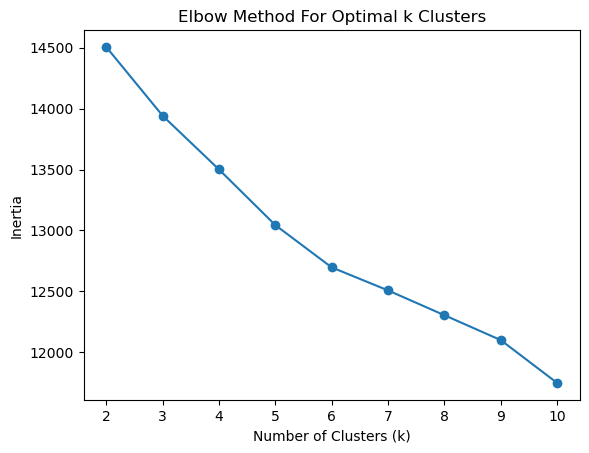

In [123]:
#elbow method, choosing k- optimal # of clusters
inertia = []
for k in range (2,11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(2, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k Clusters')
plt.show()

#elbow = where inertia drops and starts to levels off
#drop off = 6

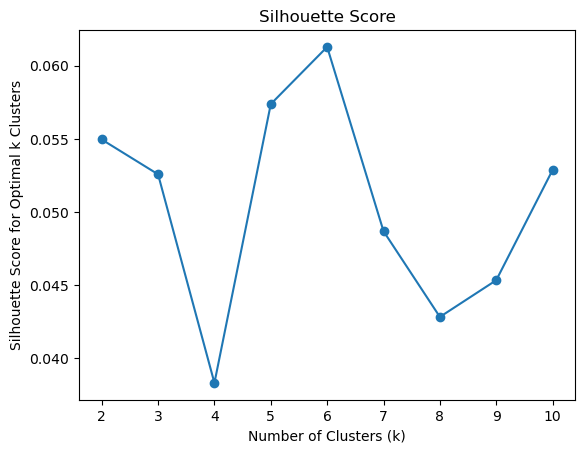

In [124]:
#silhouette score
scores = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    scores.append(silhouette_score(X_scaled, kmeans.labels_))

plt.plot(range(2, 11), scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score for Optimal k Clusters')
plt.title('Silhouette Score')
plt.show()

#silhouette = peak value
#score = 6

k chosen is 6

In [125]:
#fit model with chosen k value, predict + assign clusters
kmeans = KMeans(n_clusters=6, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

In [126]:
#cluster labels added to dataframe
df['Cluster'] = clusters

In [127]:
#avg value for each feature in each cluster, student profiles
cluster_summary = df.groupby('Cluster').mean()
pd.set_option('display.max_columns', None)
cluster_summary


,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3,school_MS,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other
Cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.387097,16.483871,0.838710,0.752688,0.903226,2.817204,2.763441,1.279570,2.182796,0.322581,0.161290,0.720430,0.548387,0.602151,0.849462,1.000000,0.978495,0.311828,4.064516,3.139785,3.064516,1.354839,2.075269,3.677419,5.860215,10.967742,0.053763,0.0,0.000000,0.892473,0.000000,0.053763,0.354839,0.440860,0.086022,0.258065,0.096774,0.322581,0.688172,0.043011
1,0.441176,16.352941,0.911765,0.705882,0.911765,3.647059,2.941176,1.205882,2.000000,0.235294,0.058824,0.764706,0.588235,0.529412,0.882353,1.000000,0.941176,0.382353,3.764706,3.205882,3.323529,1.264706,2.382353,3.764706,4.558824,12.147059,0.058824,1.0,0.000000,0.000000,0.000000,0.176471,0.500000,0.294118,0.029412,0.264706,0.176471,0.382353,0.617647,0.058824
2,0.385965,16.535088,0.833333,0.728070,0.885965,2.359649,2.236842,1.377193,2.166667,0.263158,0.175439,0.578947,0.438596,0.456140,0.736842,0.991228,1.000000,0.377193,4.052632,3.157895,3.122807,1.394737,2.184211,3.298246,7.333333,10.438596,0.043860,0.0,0.833333,0.000000,0.000000,0.017544,0.798246,0.131579,0.000000,0.342105,0.043860,0.280702,0.649123,0.105263
3,0.864865,17.945946,0.621622,0.675676,0.945946,1.756757,1.540541,2.027027,1.297297,1.324324,0.054054,0.405405,0.081081,0.324324,0.567568,0.513514,0.783784,0.324324,3.918919,3.864865,3.648649,2.297297,3.459459,3.810811,4.918919,7.810811,0.378378,0.0,0.432432,0.324324,0.000000,0.000000,0.486486,0.459459,0.000000,0.135135,0.216216,0.054054,0.567568,0.216216
4,0.666667,16.523810,0.793651,0.634921,0.888889,3.952381,3.349206,1.396825,2.047619,0.047619,0.047619,0.698413,0.619048,0.634921,0.873016,0.984127,0.952381,0.317460,3.777778,3.380952,3.015873,1.650794,2.301587,3.555556,5.619048,11.174603,0.126984,0.0,0.063492,0.000000,0.920635,0.063492,0.333333,0.317460,0.238095,0.269841,0.079365,0.238095,0.841270,0.031746
5,0.333333,16.962963,0.555556,0.722222,0.870370,2.166667,2.148148,1.703704,2.018519,0.222222,0.166667,0.444444,0.333333,0.425926,0.833333,1.000000,0.055556,0.277778,3.833333,2.981481,2.759259,1.259259,2.018519,3.574074,3.388889,9.222222,0.222222,0.0,0.481481,0.148148,0.000000,0.018519,0.685185,0.148148,0.092593,0.277778,0.055556,0.240741,0.740741,0.074074


In [128]:
#amount of students per cluster
cluster_sizes = df['Cluster'].value_counts()
cluster_sizes

Cluster
2    114
0     93
4     63
5     54
3     37
1     34
Name: count, dtype: int64

In [129]:
#boxplots of each feature by clusters
features = [
    'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
    'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
    'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
    'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences',
    'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher',
    'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher',
    'reason_home', 'reason_other', 'reason_reputation',
    'guardian_mother', 'guardian_other'
]

#for feature in features:
    #sns.boxplot(x='Cluster', y=feature, data=df)
    #plt.title(f'Comparison of {feature} Across Clusters')
    #plt.savefig(f'boxplot_{feature}.png', dpi=300, bbox_inches='tight') #saving images
    #plt.show()

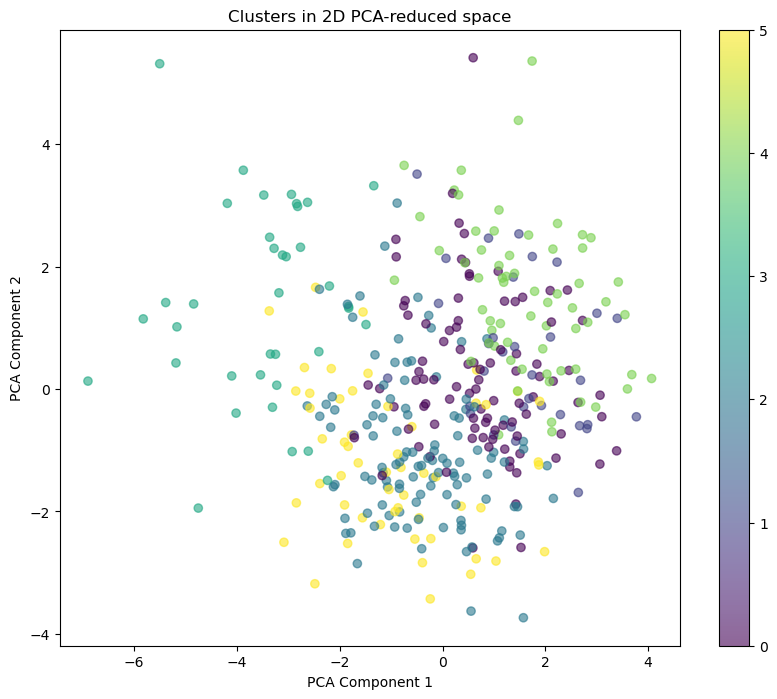

In [130]:
from sklearn.decomposition import PCA
# Reduce dimensions for visualization using PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(X_scaled)

# Plot the results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=kmeans.labels_, alpha=0.6, cmap='viridis')
plt.colorbar(scatter)
plt.title('Clusters in 2D PCA-reduced space')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()